In [1]:
import pandas as pd

# Pandas 데이터 시각화

Pandas의 plot 기능을 활용한 다양한 그래프 생성 방법을 학습합니다.

**학습 목표:**
- `plot()` 함수와 `kind` 옵션 이해
- 선 그래프 (line): 연속 데이터 시각화
- 막대 그래프 (bar, barh): 그룹별 비교
- 히스토그램 (hist): 분포 확인
- 박스 플롯 (box): 이상치 탐지
- 파이 그래프 (pie): 점유율 시각화
- 산점도 (scatter): 두 변수 간 관계

---

## 샘플 데이터

[민간 아파트 동향 (clean)](https://bit.ly/ds-house-price-clean)

## 데이터프레임 로드

In [4]:
df = pd.read_csv('https://bit.ly/ds-house-price-clean')

In [6]:
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


In [18]:
import matplotlib.pyplot as plt
from matplotlib import rc
import platform
# Check OS and set appropriate font
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic') # For Linux (requires Nanum font installed)
# Fix minus sign display issue
plt.rcParams['axes.unicode_minus'] = False

<Axes: >

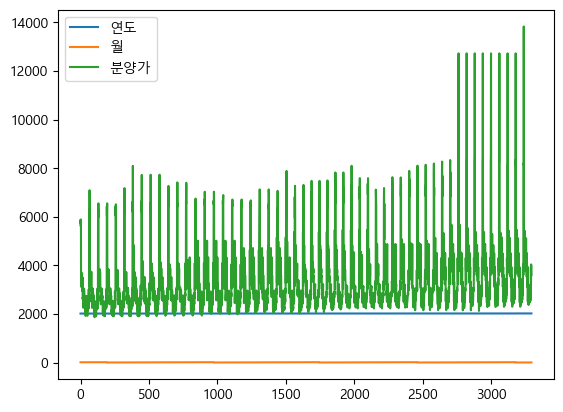

In [21]:
# x축은 인덱스, Y축은 수치형 컬럼(분양가)
df.plot()


In [19]:
import matplotlib.pyplot as plt
from matplotlib import rc
import platform
# Check OS and set appropriate font
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic') # For Linux (requires Nanum font installed)
# Fix minus sign display issue
plt.rcParams['axes.unicode_minus'] = False

## 한글 폰트가 깨지는 현상 해결 방법입니다.

### STEP 1. 아래 코드를 실행합니다.

In [20]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

������ ��θ� ã�� �� �����ϴ�.


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

### STEP 2. 상단 메뉴 - 런타임 - 런타임 다시 시작을 클릭

### STEP 3. 아래 코드를 한 번 더 실행 합니다.

In [0]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

### STEP 4. 필요한 패키지, 데이터 로딩

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://bit.ly/ds-house-price-clean')

<Axes: >

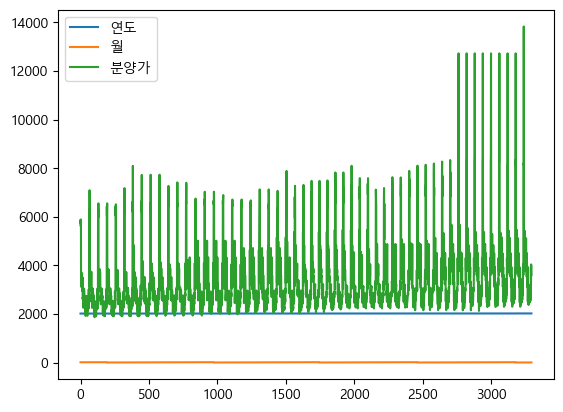

In [22]:
df.plot()

### STEP 5. Graph 사이즈 키우는 옵션

In [0]:
plt.rcParams["figure.figsize"] = (12, 9)

## 1. Plot 그래프

plot은 일반 선그래프를 나타냅니다.

In [0]:
df = pd.read_csv('https://bit.ly/ds-house-price-clean')

kind 옵션을 통해 원하는 그래프를 그릴 수 있습니다.

kind 옵션:
* line: 선그래프
* bar: 바 그래프
* barh: 수평 바 그래프
* hist: 히스토그램
* kde: 커널 밀도 그래프
* hexbin: 고밀도 산점도 그래프
* box: 박스 플롯
* area: 면적 그래프
* pie: 파이 그래프
* scatter: 산점도 그래프


데이터의 성격에 맞는 그래프 형식이 있습니다. 앞으로 차근차근 살펴보도록 하겠습니다.

## line 그래프

* line 그래프는 데이터가 연속적인 경우 사용하기 적절합니다. (예를 들면, 주가 데이터)

In [0]:
df['분양가'].plot(kind='line')

In [0]:
df_seoul = df.loc[df['지역'] == '서울']

In [0]:
df_seoul

In [0]:
df_seoul_year = df_seoul.groupby('연도').mean()

In [0]:
df_seoul_year

In [0]:
df_seoul_year['분양가'].plot(kind='line')

## bar 그래프

bar 그래프는 그룹별로 비교할 때 유용합니다.

In [0]:
df.groupby('지역')['분양가'].mean()

In [0]:
df.groupby('지역')['분양가'].mean().plot(kind='bar')

In [0]:
df.groupby('지역')['분양가'].mean().plot(kind='barh')

## 히스토그램 (hist)

히스토그램은 **분포-빈도 를 시각화**하여 보여줍니다

가로축에는 분포를, 세로축에는 빈도가 시각화되어 보여집니다.

In [0]:
df['분양가'].plot(kind='hist')

## 커널 밀도 그래프

* 히스토그램과 유사하게 밀도를 보여주는 그래프입니다.
* 히스토그램과 유사한 모양새를 갖추고 있습니다. 
* 부드러운 라인을 가지고 있습니다.

In [0]:
df['분양가'].plot(kind='kde')

## Hexbin

* hexbin은 고밀도 산점도 그래프입니다.
* x와 y 키 값을 넣어 주어야 합니다.
* x, y 값 모두 numeric 한 값을 넣어 주어야합니다.
* 데이터의 밀도를 추정합니다.

In [0]:
df.plot(kind='hexbin', x='분양가', y='연도', gridsize=20)

## 박스 플롯(box)

In [0]:
df_seoul = df.loc[df['지역'] == '서울']

In [0]:
df_seoul['분양가'].plot(kind='box')

In [0]:
from IPython.display import Image

# image source : https://justinsighting.com/how-to-interpret-box-plots/
Image('https://justinsighting.com/wp-content/uploads/2016/12/boxplot-description.png')

In [0]:
df_seoul.describe()

IQR은 Inter Quantile Range의 약어로써, (3Q - 1Q) * 1.5 값입니다.

In [0]:
IQR = (7732 - 6519.75) * 1.5
IQR

In [0]:
## 박스 플롯 max
7732 + IQR

In [0]:
## 박스 플롯 min
6519.75 - IQR

박스플롯은 데이터 outlier 감지 할 떄 가장 많이 활용 되며, 25%, median, 75% 분위의 값을 활용하는 용도로 많이 활용됩니다.

## area plot

* area plot은 line 그래프에서 아래 area를 모두 색칠해 주는 것이 특징입니다.

In [0]:
df.groupby('월')['분양가'].count().plot(kind='line')

In [0]:
df.groupby('월')['분양가'].count().plot(kind='area')

## pie plot (파이 그래프)

pie는 대표적으로 데이터의 점유율을 보여줄 때 유용합니다.

In [0]:
df.groupby('연도')['분양가'].count().plot(kind='pie')

## scatter plot (산점도 그래프)

* 점으로 데이터를 표기해 줍니다
* x, y 값을 넣어주어야합니다 (hexbin과 유사)
* x축과 y축을 지정해주면 그에 맞는 데이터 분포도를 볼 수 있습니다.
* 역시 numeric 한 column 만 지정할 수 있습니다

In [0]:
df.plot(x='월', y='분양가', kind='scatter')

---
## 정리

| 그래프 종류 | kind 옵션 | 용도 |
|------------|----------|------|
| 선 그래프 | `line` | 연속 데이터, 시계열 |
| 막대 그래프 | `bar`, `barh` | 그룹별 비교 |
| 히스토그램 | `hist` | 분포 확인 |
| 커널 밀도 | `kde` | 부드러운 분포 곡선 |
| 박스 플롯 | `box` | 이상치 탐지, 사분위수 |
| 면적 그래프 | `area` | 누적 시각화 |
| 파이 그래프 | `pie` | 점유율 시각화 |
| 산점도 | `scatter` | 두 변수 간 관계 |
| 고밀도 산점도 | `hexbin` | 밀도 추정 |

**사용법:**
```python
df['column'].plot(kind='그래프종류')
df.plot(kind='scatter', x='x축column', y='y축column')
```

**박스 플롯 해석:**
- IQR = (Q3 - Q1) * 1.5
- 이상치: Q1 - IQR 미만 또는 Q3 + IQR 초과